<a href="https://colab.research.google.com/github/mohnabil2020/machine_learning/blob/master/Rock_Paper_Scissors_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is for making multi classification between rock & paper & scissors in different shape and colors of hands**


---



---
***My target is :***


1.   Increasing accuracy rate and decreasing loss rate as possible

1.   Prevent overfitting
2.   Reach accuracy >= 97% and stop the training immediately

**hint**

I used dataset from  [this site](http://www.laurencemoroney.com/rock-paper-scissors-dataset/)




In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-08-02 21:15:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 74.125.200.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  92.8MB/s    in 2.1s    

2020-08-02 21:15:24 (92.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-08-02 21:15:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.130.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import random

from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

Using TensorFlow backend.


In [3]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

['rock03-098.png', 'rock07-k03-056.png', 'rock03-053.png', 'rock02-047.png', 'rock02-099.png', 'rock05ck01-083.png', 'rock04-084.png', 'rock01-002.png', 'rock02-106.png', 'rock07-k03-007.png']
['paper04-040.png', 'paper02-067.png', 'paper04-022.png', 'paper03-116.png', 'paper04-085.png', 'paper03-018.png', 'paper01-049.png', 'paper07-078.png', 'paper03-098.png', 'paper03-005.png']
['scissors04-020.png', 'testscissors03-017.png', 'scissors02-084.png', 'scissors04-057.png', 'testscissors01-013.png', 'testscissors03-075.png', 'testscissors02-058.png', 'scissors02-000.png', 'scissors02-075.png', 'scissors03-001.png']
total training rock images: 840
total training paper images: 840
total training scissors images: 840


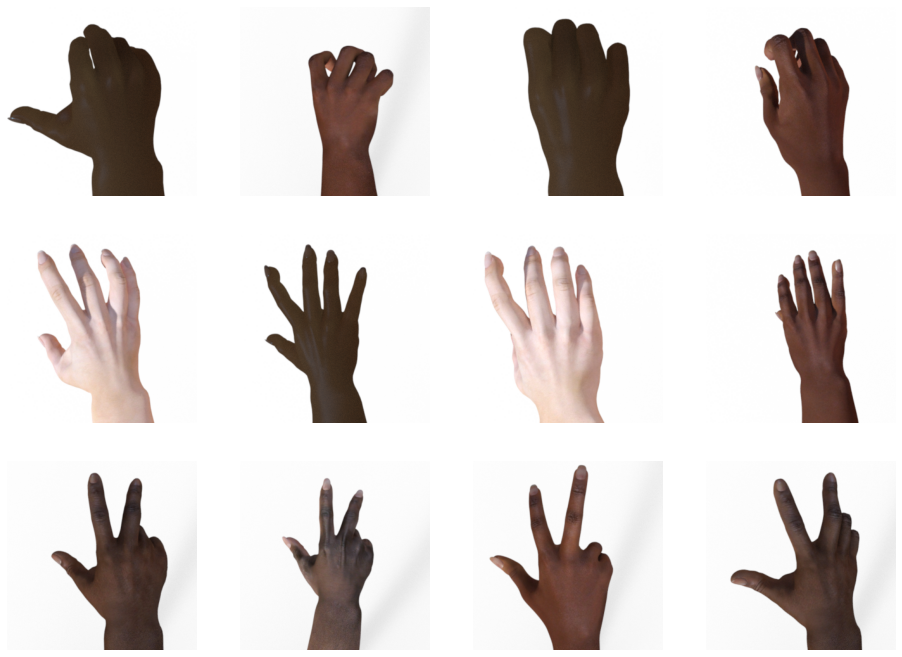

In [28]:
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4

next_rock_pix = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-4:pic_index]]

next_paper_pix = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-4:pic_index]]

next_scissors_pix = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-4:pic_index]]                


for i, img_path in enumerate(next_rock_pix+next_paper_pix+next_scissors_pix):
  sp = plt.subplot(nrows, ncols, i + 1 )
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [29]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
                                        rescale = 1./255,
	                                    rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest'
                                        )

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	                                                            TRAINING_DIR,
	                                                            target_size=(150,150),
	                                                            class_mode='categorical',
                                                                batch_size=126
                                                        )

validation_generator = validation_datagen.flow_from_directory(
	                                                            VALIDATION_DIR,
	                                                            target_size=(150,150),
	                                                            class_mode='categorical',
                                                                batch_size=126
                                                            )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [30]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>=.97):
                print("\nReached 97 % accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

In [31]:
model = tf.keras.models.Sequential([
                                    
                tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                tf.keras.layers.MaxPooling2D(2, 2),

                tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                
                tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [32]:
model.compile(
                loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [33]:
history=model.fit(
                    train_generator,  
                    validation_data = validation_generator,
                    epochs=20,
                    callbacks=[callbacks]
                  )

Epoch 1/20
20/20 [==============================] - 21s 1s/step - loss: 0.6437 - accuracy: 0.3389 - val_loss: 0.6349 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 21s 1s/step - loss: 0.6221 - accuracy: 0.4194 - val_loss: 0.5704 - val_accuracy: 0.5699
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 0.5324 - accuracy: 0.5595 - val_loss: 0.3645 - val_accuracy: 0.7823
Epoch 4/20
20/20 [==============================] - 21s 1s/step - loss: 0.4083 - accuracy: 0.7206 - val_loss: 0.1973 - val_accuracy: 0.9005
Epoch 5/20
20/20 [==============================] - 21s 1s/step - loss: 0.3371 - accuracy: 0.7667 - val_loss: 0.1820 - val_accuracy: 0.8468
Epoch 6/20
20/20 [==============================] - 21s 1s/step - loss: 0.2648 - accuracy: 0.8337 - val_loss: 0.0743 - val_accuracy: 0.9704
Epoch 7/20
20/20 [==============================] - 21s 1s/step - loss: 0.2048 - accuracy: 0.8722 - val_loss: 0.0467 - val_accuracy: 0.9731
Epoch 8/20
20/20 [==

**This chart shows that I stopped overfitting from being occuered**

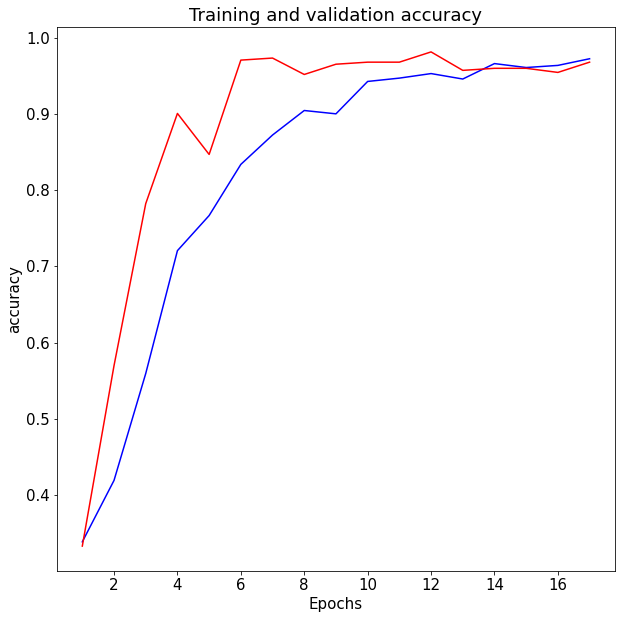

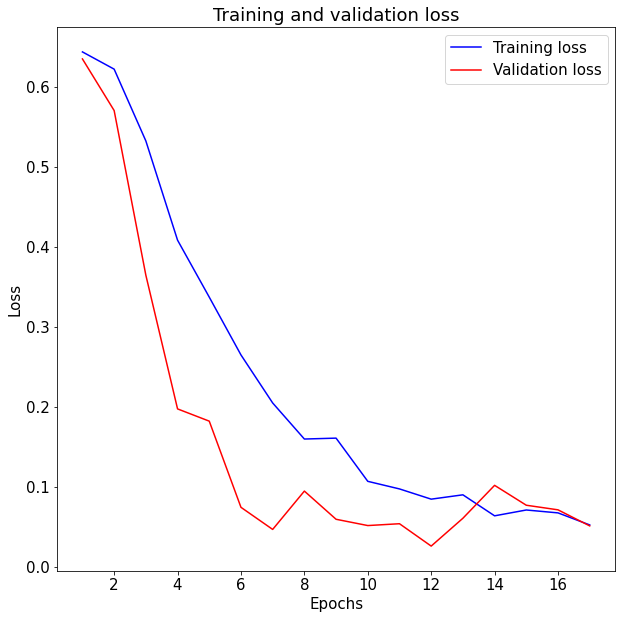

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc , 'b' , label = 'Training accuracy' )
plt.plot(epochs , val_acc, 'r' , label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.figure()

plt.plot(epochs , loss , 'b' , label = 'Training loss' )
plt.plot(epochs , val_loss , 'r' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

**To make predictions of the model I download validation images from [this link](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip)**

In [42]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper1.png to paper1 (2).png
Saving rock3.png to rock3.png
Saving scissors2.png to scissors2 (1).png
paper1.png
[[1. 0. 0.]]
rock3.png
[[0. 1. 0.]]
scissors2.png
[[0. 0. 1.]]


**predictions are sorted alphabetically**

for example :

[[1. 0. 0.]]==paper

[[0. 1. 0.]]==rock

[[0. 0. 1.]]==scissors